In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lohithsowmiyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 30)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/85 Version/11.1.1 Safari/605.1.15'
config = Config()
config.browser_user_agent = user_agent
#config.request_timeout = 100


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lohithsowmiyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# save the company name in a variable
company_name = input("Please provide the name of the Company or a Ticker: ")
#As long as the company name is valid, not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(company_name)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df)

Please provide the name of the Company or a Ticker: apple
Searching for and analyzing apple, Please be patient, it might take a while...
Empty DataFrame
Columns: []
Index: []


In [5]:
!streamlit run Sentiment.ipynb

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .ipynb.
For more information, please see https://docs.streamlit.io


In [6]:
try:
    list =[] #creating an empty list 
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article 
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )


          Date                Media  \
0  2 weeks ago                Apple   
1  2 weeks ago               Forbes   
2  2 weeks ago                WIRED   
3  3 weeks ago   The Indian Express   
4  3 weeks ago  European Commission   
5  3 weeks ago            The Verge   
6   1 week ago       Times of India   
7   1 week ago                 Mint   
8  3 weeks ago      Markets Insider   
9   5 days ago            CNBC TV18   

                                               Title  \
0  Apple, Google, and Microsoft commit to expande...   
1  Apple’s Stunning 2022 Security Pact With Googl...   
2                                                      
3                                                      
4                                       Press corner   
5  Apple Pay is anticompetitive, says EU in preli...   
6  apple: More than 15 lakh apps may be removed b...   
7  Apple no longer world's most valuable company....   
8  Nasdaq futures drop after disappointing Amazon...   
9  Apple r

In [7]:
news_df.head()

,Date,Media,Title,Article,Summary,Key_words
0,2 weeks ago,Apple,"Apple, Google, and Microsoft commit to expande...",In a joint effort to make the web more secure ...,In a joint effort to make the web more secure ...,"[passwords, support, users, expanded, password..."
1,2 weeks ago,Forbes,Apple’s Stunning 2022 Security Pact With Googl...,"Truth be told, I'm not the greatest fan of Wor...","Here's what Apple, Google and Microsoft announ...","[passwords, pact, 2022, passwordless, apple, s..."
2,2 weeks ago,WIRED,,,,[]
3,3 weeks ago,The Indian Express,,,,[]
4,3 weeks ago,European Commission,Press corner,,,"[press, corner]"


In [8]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       10 non-null     object
 1   Media      10 non-null     object
 2   Title      10 non-null     object
 3   Article    10 non-null     object
 4   Summary    10 non-null     object
 5   Key_words  10 non-null     object
dtypes: object(6)
memory usage: 608.0+ bytes


In [9]:
data = news_df['Summary']

# NLP Processing steps:

## tokenizing

In [10]:
data.head()

0    In a joint effort to make the web more secure ...
1    Here's what Apple, Google and Microsoft announ...
2                                                     
3                                                     
4                                                     
Name: Summary, dtype: object

In [11]:
from nltk import word_tokenize

In [12]:
data = data.apply(lambda text : word_tokenize(text))
data

0    [In, a, joint, effort, to, make, the, web, mor...
1    [Here, 's, what, Apple, ,, Google, and, Micros...
2                                                   []
3                                                   []
4                                                   []
5    [Apple, has, been, hit, with, an, antitrust, a...
6    [Earlier, this, year, ,, Apple, and, Google, s...
7    [Saudi, Aramco, overtook, Apple, Inc., as, the...
8    [Nasdaq, futures, dropped, 0.9, %, Friday, as,...
9    [Unlike, iOS, 15.4, that, introduced, the, Uni...
Name: Summary, dtype: object

In [13]:
for row,i in zip(data,data.index):
    if row == []:
        data.drop(i,inplace=True)
data.head()

0    [In, a, joint, effort, to, make, the, web, mor...
1    [Here, 's, what, Apple, ,, Google, and, Micros...
5    [Apple, has, been, hit, with, an, antitrust, a...
6    [Earlier, this, year, ,, Apple, and, Google, s...
7    [Saudi, Aramco, overtook, Apple, Inc., as, the...
Name: Summary, dtype: object

## removing stopwords

In [14]:
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    li = []
    for word in text:
        if word not in en_stopwords:
            li.append(word)
    return li

In [15]:
data = data.apply(remove_stopwords)
data

0    [In, joint, effort, make, web, secure, usable,...
1    [Here, 's, Apple, ,, Google, Microsoft, announ...
5    [Apple, hit, antitrust, accusation, European, ...
6    [Earlier, year, ,, Apple, Google, shot, warnin...
7    [Saudi, Aramco, overtook, Apple, Inc., world, ...
8    [Nasdaq, futures, dropped, 0.9, %, Friday, inv...
9    [Unlike, iOS, 15.4, introduced, Universal, Con...
Name: Summary, dtype: object

## removing special character strings

In [16]:
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
    
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

In [17]:
data=data.apply(remove_punct)
data

0    [In, joint, effort, make, web, secure, usable,...
1    [Here, s, Apple, Google, Microsoft, announced,...
5    [Apple, hit, antitrust, accusation, European, ...
6    [Earlier, year, Apple, Google, shot, warning, ...
7    [Saudi, Aramco, overtook, Apple, Inc, world, v...
8    [Nasdaq, futures, dropped, 0, 9, Friday, inves...
9    [Unlike, iOS, 15, 4, introduced, Universal, Co...
Name: Summary, dtype: object

In [18]:
from nltk import FreqDist
def frequent_words(df):
    
    lst=[]
    for text in df.values:
        lst+=text
    fdist=FreqDist(lst)
    return fdist.most_common(10)

frequent_words(data)

[('Apple', 27),
 ('Google', 11),
 ('The', 9),
 ('iOS', 9),
 ('apps', 8),
 ('Store', 8),
 ('Microsoft', 7),
 ('15', 7),
 ('App', 6),
 ('5', 6)]

## lemmatize

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result

In [20]:
data =data.apply(lemmatization)
data

0    [In, joint, effort, make, web, secure, usable,...
1    [Here, s, Apple, Google, Microsoft, announce, ...
5    [Apple, hit, antitrust, accusation, European, ...
6    [Earlier, year, Apple, Google, shot, warn, dev...
7    [Saudi, Aramco, overtook, Apple, Inc, world, v...
8    [Nasdaq, future, drop, 0, 9, Friday, investor,...
9    [Unlike, iOS, 15, 4, introduce, Universal, Con...
Name: Summary, dtype: object

# NLP Vader classification

In [19]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lohithsowmiyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
import numpy as np

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

si = SentimentIntensityAnalyzer()

def classify_sentiments(text):
    string = " ".join(text)
    return si.polarity_scores(string)

In [23]:
scores = data.apply(classify_sentiments)
sentiments = pd.DataFrame({'text':data,'scores':scores})
#sentiments['label'] = scores.apply(lambda label: np.argmax(label))
sentiments.head()

,text,scores
0,"[In, joint, effort, make, web, secure, usable,...","{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'comp..."
1,"[Here, s, Apple, Google, Microsoft, announce, ...","{'neg': 0.027, 'neu': 0.676, 'pos': 0.298, 'co..."
5,"[Apple, hit, antitrust, accusation, European, ...","{'neg': 0.161, 'neu': 0.741, 'pos': 0.098, 'co..."
6,"[Earlier, year, Apple, Google, shot, warn, dev...","{'neg': 0.107, 'neu': 0.795, 'pos': 0.099, 'co..."
7,"[Saudi, Aramco, overtook, Apple, Inc, world, v...","{'neg': 0.102, 'neu': 0.665, 'pos': 0.233, 'co..."


Positive Sentiment: 57.14
Neutral Sentiment: 0.00
Negative Sentiment: 42.86


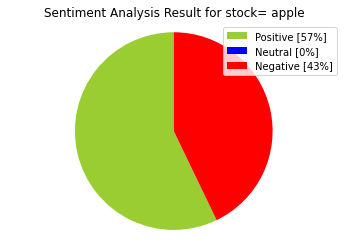

In [24]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for score in sentiments['scores']:
    
    if score['neg'] > score['pos']:
        negative += 1 #increasing the count by 1
    elif score['pos'] > score['neg']:
        positive += 1 #increasing the count by 1
    elif score['pos'] == score['neg']:
        neutral += 1 #increasing the count by 1 

positive = percentage(positive,len(sentiments['text'])) #percentage is the function defined above
negative = percentage(negative,len(sentiments['text']))
neutral = percentage(neutral,len(sentiments['text']))

#Converting lists to pandas dataframe

#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % positive, end='\n')
print("Neutral Sentiment:", '%.2f' % neutral, end='\n')
print("Negative Sentiment:", '%.2f' % negative, end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()

In [25]:
import yfinance as yf
from pandas_datareader.data import DataReader
from datetime import datetime,date
import requests

In [30]:
import yfinance as yf

stock_name_list = []
def getStock(search_term):
    results = []
    query = requests.get(f'https://yfapi.net/v6/finance/autocomplete?region=IN&lang=en&query={search_term}', 
    headers={
        'accept': 'application/json',
        'X-API-KEY': 'I8Rvn4Fa7R9FTRV4U7qNx8UzoEEAg9oYGllN9Fmd'
    })
    response = query.json()
    print(response)
    
    for i in response['ResultSet']['Result']:
        final = i['symbol']
        results.append(final)
        stock_name_list.append(final)
        
    
    stock_list = [results[0]]

    end = datetime.now()
    start = datetime(end.year,1,end.day)

    for stock in stock_list:
        globals()[stock] = yf.download(stock ,start ,end)
    #print(globals()[results[0]])

getStock(company_name)

{'message': 'Forbidden', 'hint': 'Sign up for API key https://financeapi.com/tutorial'}


In [26]:
import seaborn as sns

In [27]:
stock_name_list

['GOOG', '^VXGOG']

In [28]:
comp = globals()[stock_name_list[0]]

In [29]:
ma = [10,20,30]

for i in ma:
    column_name = "MA for {ma}".format(ma=i)
    axis[column_name] = axis['Close'].rolling(i).mean()

In [30]:
axis.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10,MA for 20,MA for 30
Date,,,,,,,,,
2022-01-10,2701.979980,2772.800049,2662.810059,2771.479980,2771.479980,1704800,NaN,NaN,NaN
2022-01-11,2763.610107,2806.590088,2736.270020,2800.350098,2800.350098,1175100,NaN,NaN,NaN
2022-01-12,2831.090088,2856.284912,2822.239990,2832.959961,2832.959961,1182100,NaN,NaN,NaN
2022-01-13,2836.810059,2863.709961,2778.280029,2782.620117,2782.620117,1328300,NaN,NaN,NaN
2022-01-14,2750.000000,2824.010010,2750.000000,2795.729980,2795.729980,1191300,NaN,NaN,NaN


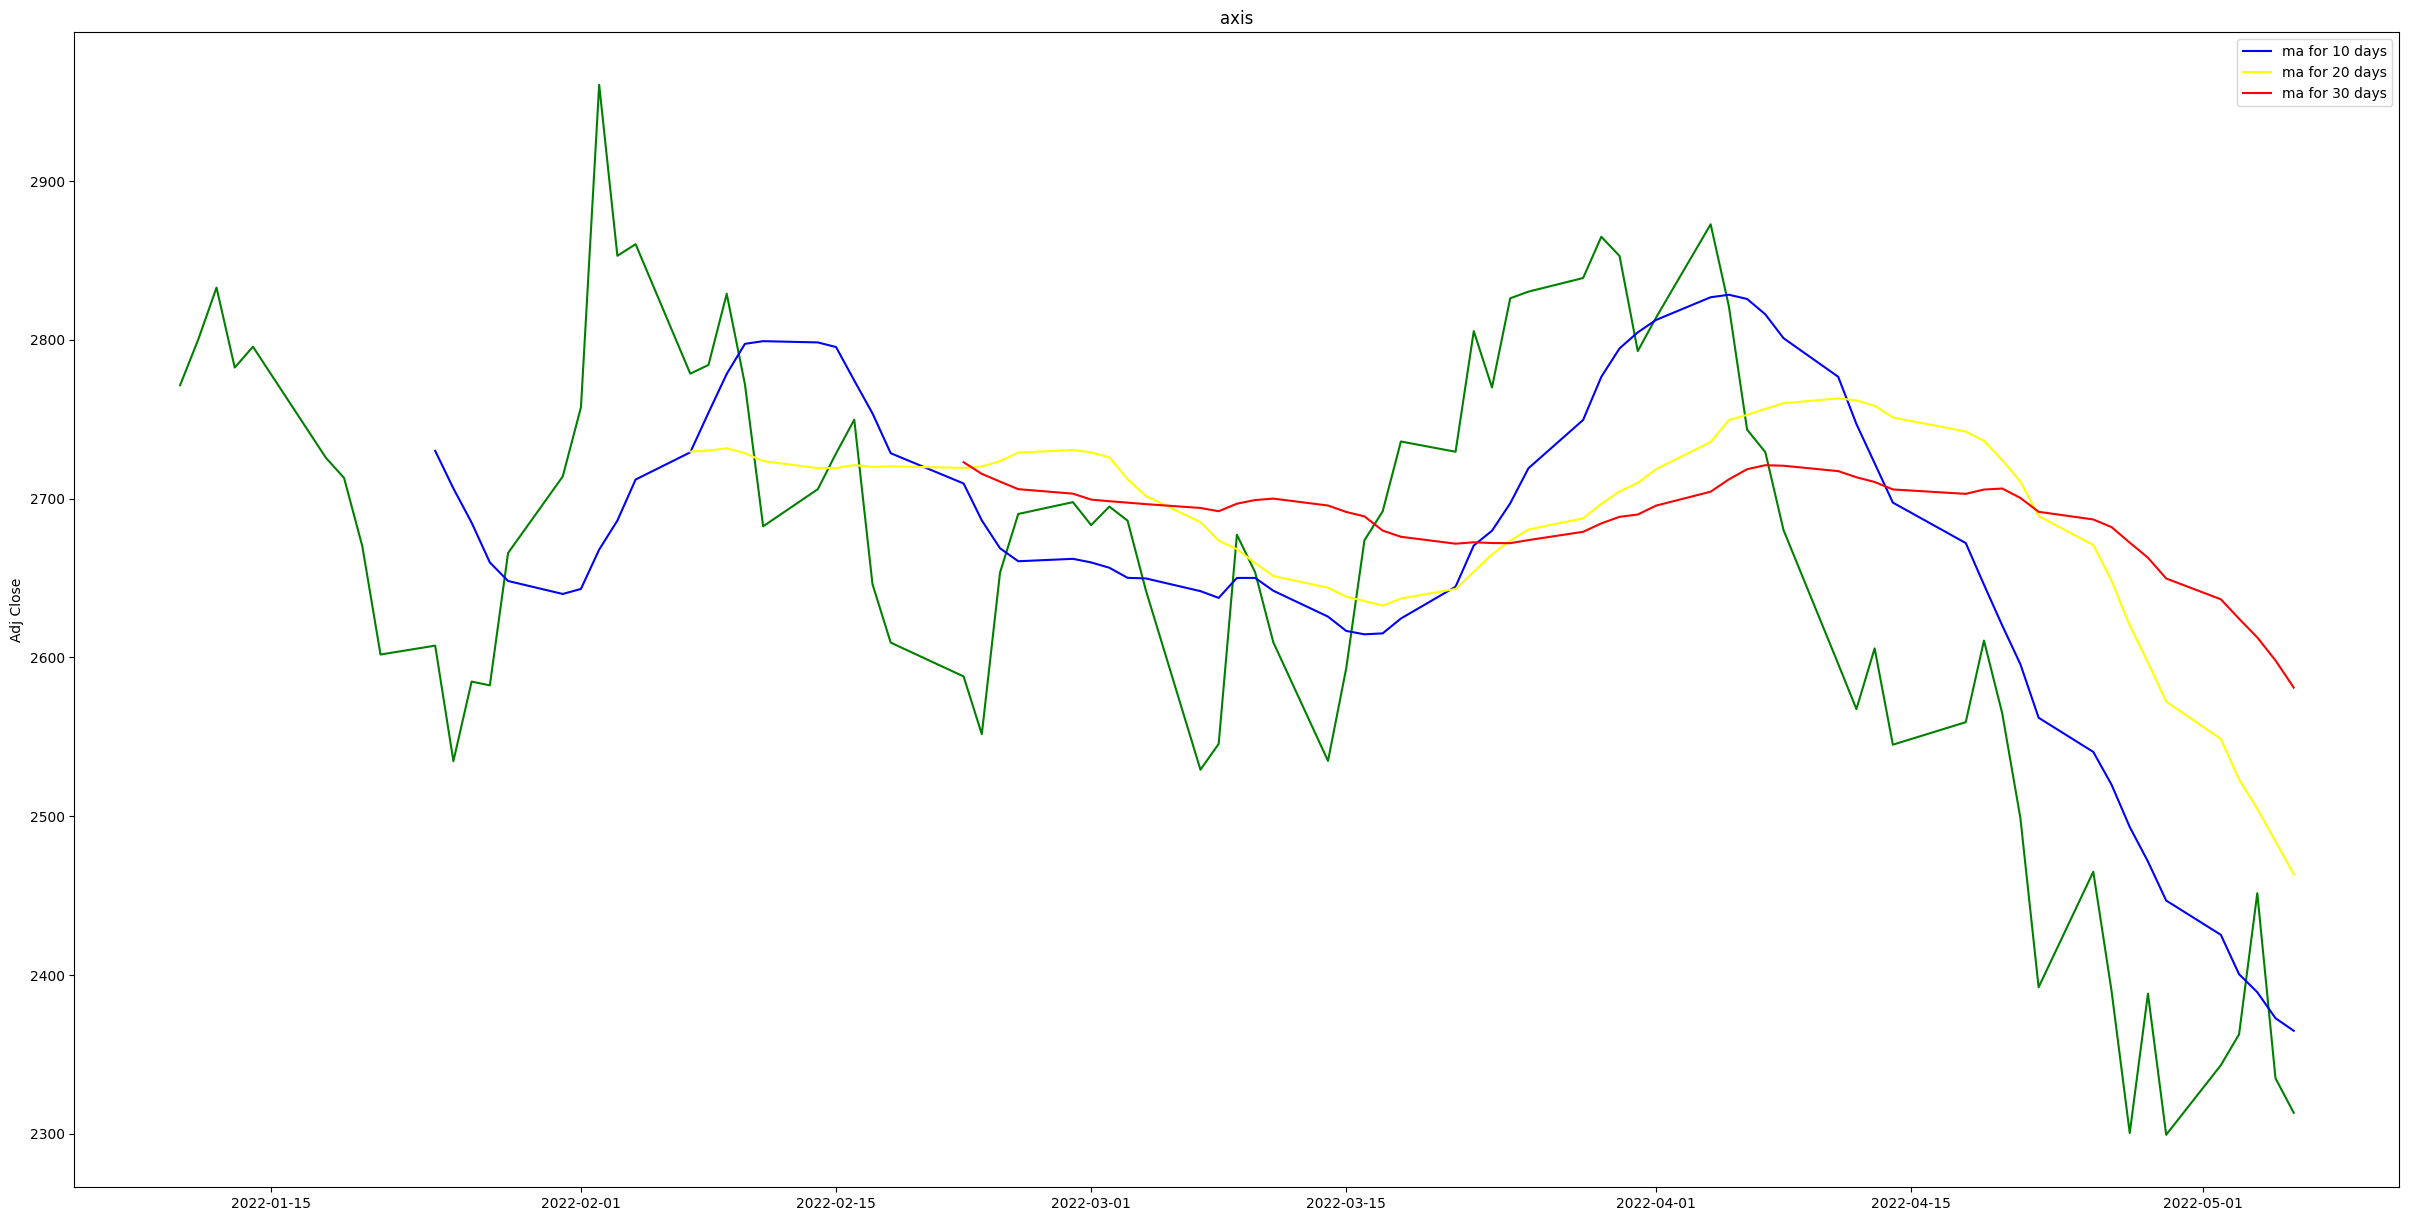

In [31]:
plt.figure(figsize=(30,15))
sns.lineplot(x = axis.index,y=axis['Adj Close'],color='green')
sns.lineplot(x = axis.index,y=axis['MA for 10'],color='blue',label='ma for 10 days')
sns.lineplot(x =axis.index,y=axis['MA for 20'],color='yellow',label='ma for 20 days')
sns.lineplot(x = axis.index,y=axis['MA for 30'],color='red',label='ma for 30 days')
plt.title('axis')
plt.xlabel(None)
plt.ylabel('Adj Close')
plt.show()

In [32]:
company = yf.Ticker(stock_name_list[0])
print("Attributes list")
for i in company.info.keys():
    print(i)

Attributes list
zip
sector
fullTimeEmployees
longBusinessSummary
city
phone
state
country
companyOfficers
website
maxAge
address1
industry
ebitdaMargins
profitMargins
grossMargins
operatingCashflow
revenueGrowth
operatingMargins
ebitda
targetLowPrice
recommendationKey
grossProfits
freeCashflow
targetMedianPrice
currentPrice
earningsGrowth
currentRatio
returnOnAssets
numberOfAnalystOpinions
targetMeanPrice
debtToEquity
returnOnEquity
targetHighPrice
totalCash
totalDebt
totalRevenue
totalCashPerShare
financialCurrency
revenuePerShare
quickRatio
recommendationMean
exchange
shortName
longName
exchangeTimezoneName
exchangeTimezoneShortName
isEsgPopulated
gmtOffSetMilliseconds
quoteType
symbol
messageBoardId
market
annualHoldingsTurnover
enterpriseToRevenue
beta3Year
enterpriseToEbitda
52WeekChange
morningStarRiskRating
forwardEps
revenueQuarterlyGrowth
sharesOutstanding
fundInceptionDate
annualReportExpenseRatio
totalAssets
bookValue
sharesShort
sharesPercentSharesOut
fundFamily
lastFiscalY

In [33]:
attr = input("Enter any attribute")
print(attr," for ",company_name," = ",company.info[attr])

Enter any attributegrossProfits
grossProfits  for  google  =  146698000000


In [34]:
import yahoo_fin.stock_info as si

In [35]:
si.get_stats_valuation(stock_name_list[0])

,0,1
0,Market Cap (intraday),1.54T
1,Enterprise Value,1.43T
2,Trailing P/E,21.12
3,Forward P/E,20.49
4,PEG Ratio (5 yr expected),0.83
5,Price/Sales (ttm),5.82
6,Price/Book (mrq),6.05
7,Enterprise Value/Revenue,5.29
8,Enterprise Value/EBITDA,13.99


In [36]:
income_statement = si.get_income_statement(stock_name_list[0])
income_statement = income_statement.transpose()
income_statement

Breakdown,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,operatingIncome,otherOperatingExpenses,...,nonRecurring,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares
endDate,,,,,,,,,,,,,,,,,,,,,
2021-12-31,31562000000,None,90734000000,None,76033000000,36422000000,146698000000,78714000000,78714000000,None,...,None,None,14701000000,257637000000,178923000000,110939000000,12020000000,None,76033000000,76033000000
2020-12-31,27573000000,None,48082000000,None,40269000000,28998000000,97795000000,41224000000,41224000000,None,...,None,None,7813000000,182527000000,141303000000,84732000000,6858000000,None,40269000000,40269000000
2019-12-31,26018000000,None,39625000000,None,34343000000,28015000000,89961000000,35928000000,35928000000,None,...,None,None,5282000000,161857000000,125929000000,71896000000,3697000000,None,34343000000,34343000000
2018-12-31,21419000000,None,34913000000,None,30736000000,23256000000,77270000000,32595000000,32595000000,None,...,None,None,4177000000,136819000000,104224000000,59549000000,2318000000,None,30736000000,30736000000


/Users/lohithsowmiyan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


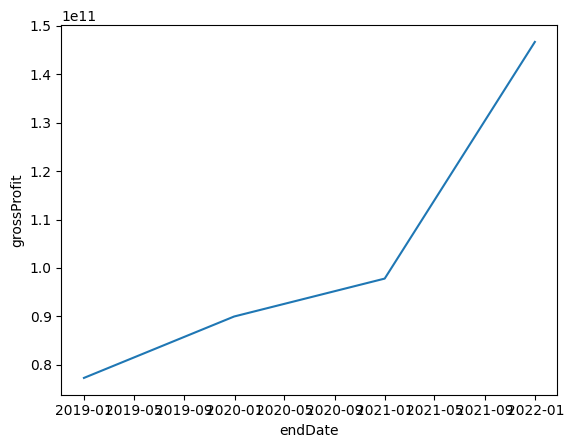

In [37]:
sns.lineplot(income_statement.index,income_statement['grossProfit'])
plt.show()